In [6]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"thisisvinnamre","key":"93a84a8b1479bcaff503a8136972af23"}'}

In [7]:
!pip install kaggle

In [8]:
!rm rf ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove 'rf': No such file or directory
rm: cannot remove '/root/.kaggle': Is a directory
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!kaggle datasets download salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 264MB/s]
100% 1.06G/1.06G [00:04<00:00, 231MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('./dogs-vs-cats.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
#before model we will make generators which will help us to loads the data in batches

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = './train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = './test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 5000 files belonging to 2 classes.


In [20]:
#Normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

In [21]:
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [26]:
# model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation ='relu', input_shape = (256,256,3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
history = model.fit(train_ds, epochs = 10, validation_data = (val_ds))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.5447 - loss: 0.7441 - val_accuracy: 0.7116 - val_loss: 0.5578
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.7201 - loss: 0.5549 - val_accuracy: 0.7614 - val_loss: 0.4984
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7917 - loss: 0.4504 - val_accuracy: 0.7680 - val_loss: 0.5181
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.8517 - loss: 0.3367 - val_accuracy: 0.7654 - val_loss: 0.5443
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9160 - loss: 0.2048 - val_accuracy: 0.7740 - val_loss: 0.6793
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9609 - loss: 0.1058 - val_accuracy: 0.7638 - val_loss: 0.9390
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9717 - loss: 0.0798 - val_accuracy: 0.7754 - val_loss: 0.9437
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9793 - loss: 0.0609 - 

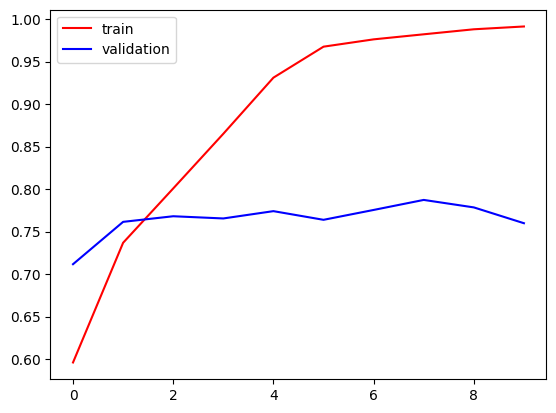

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

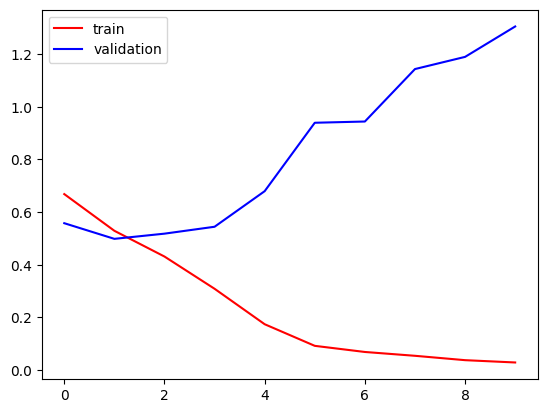

In [33]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# **Overfitting is happening in the results**

In [34]:
from keras.layers import BatchNormalization, Dropout

In [35]:
# we will use batch normalization and dropout to prevent overfitting
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation ='relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
history = model.fit(train_ds, epochs = 10, validation_data = (val_ds))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - accuracy: 0.5515 - loss: 2.6656 - val_accuracy: 0.5362 - val_loss: 0.7406
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.5927 - loss: 0.6502 - val_accuracy: 0.5358 - val_loss: 0.6670
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6639 - loss: 0.6124 - val_accuracy: 0.7362 - val_loss: 0.5576
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7265 - loss: 0.5344 - val_accuracy: 0.5948 - val_loss: 0.6024
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7589 - loss: 0.4651 - val_accuracy: 0.7006 - val_loss: 0.6008
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.7758 - loss: 0.4374 - val_accuracy: 0.6432 - val_loss: 0.8055
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8034 - loss: 0.3723 - val_accuracy: 0.7806 - val_loss: 0.5301
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8235 - loss: 0.3366 - 

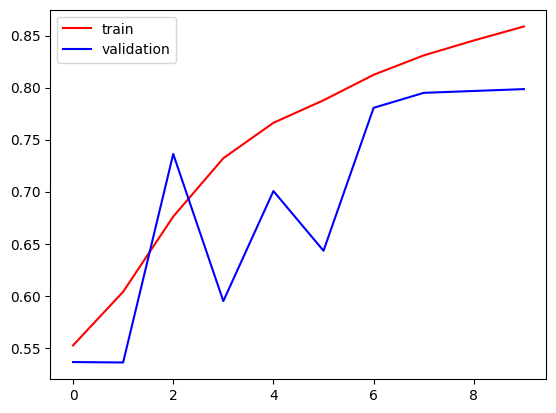

In [38]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

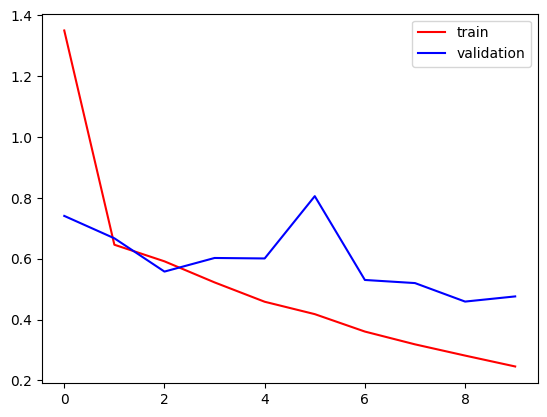

In [39]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

**Data Augmentation**

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [42]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [43]:
train_ds = datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_ds = datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [46]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 279s 440ms/step - accuracy: 0.5634 - loss: 0.7002 - val_accuracy: 0.6714 - val_loss: 0.5994
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 396ms/step - accuracy: 0.6749 - loss: 0.5995 - val_accuracy: 0.7152 - val_loss: 0.5507
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 395ms/step - accuracy: 0.7162 - loss: 0.5550 - val_accuracy: 0.7392 - val_loss: 0.5215
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 390ms/step - accuracy: 0.7334 - loss: 0.5278 - val_accuracy: 0.7511 - val_loss: 0.5049
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 392ms/step - accuracy: 0.7539 - loss: 0.4999 - val_accuracy: 0.7570 - val_loss: 0.4932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 391ms/step - accuracy: 0.7757 - loss: 0.4774 - val_accuracy: 0.7770 - val_loss: 0.4619
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 429ms/step - accuracy: 0.7789 - loss: 0.4631 - val_accuracy: 0.7828 - val_loss: 0.4665
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 299s 393ms/step - accuracy: 0.7892 -